# Unsupervised learning


In unsupervised learning problems, we only have
input data **x(i)** with **no labels**, and we want the algorithm to find some structure in the data. A clustering
algorithm such as the **k-means** algorithm attempts to group the data into k “clusters” which have some
**similarity**.

Examples : Social Network Analysis, Organizing Computer
Clusters, and Astronomical Data Analysis.

## K-Means

The Κ-means clustering algorithm uses iterative refinement to produce a final result. The algorithm inputs are the number of clusters Κ and the data set. The data set is a collection of features for each data point. The algorithms starts with initial estimates for the Κ centroids, which can either be randomly generated or **randomly** selected from the data set. The algorithm then iterates between two steps:

**1. Data assigment step:**

Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, based on the squared Euclidean distance. More formally, if ci is the collection of centroids in set C, then each data point x is assigned to a cluster based on

**$$\underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2$$**



**2. Centroid update step:**

In this step, the centroids are recomputed. This is done by taking the mean of all data points assigned to that centroid's cluster.

**$$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i x_i}$$**

![](images/clustering/kmeans.gif)



see more click [here](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

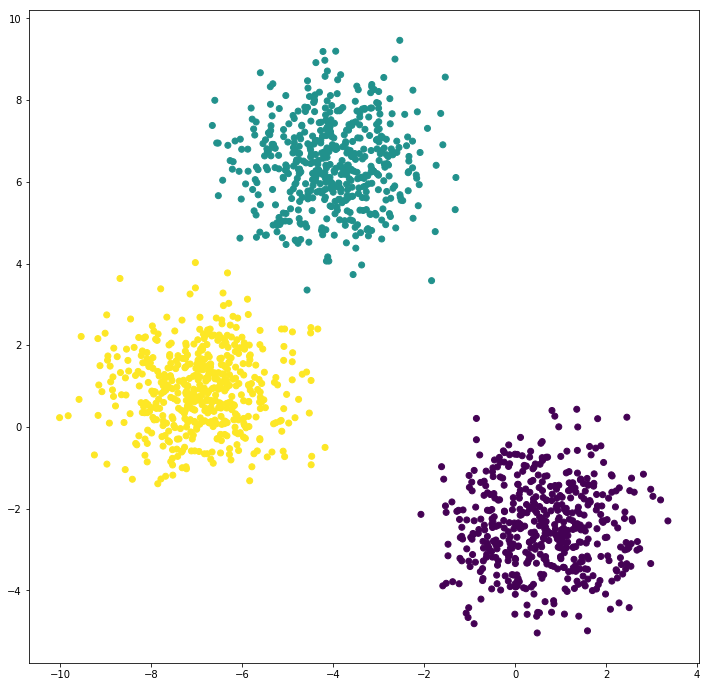

In [62]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 1760
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [63]:
kmeans.score(X)

-3117.5261895753729

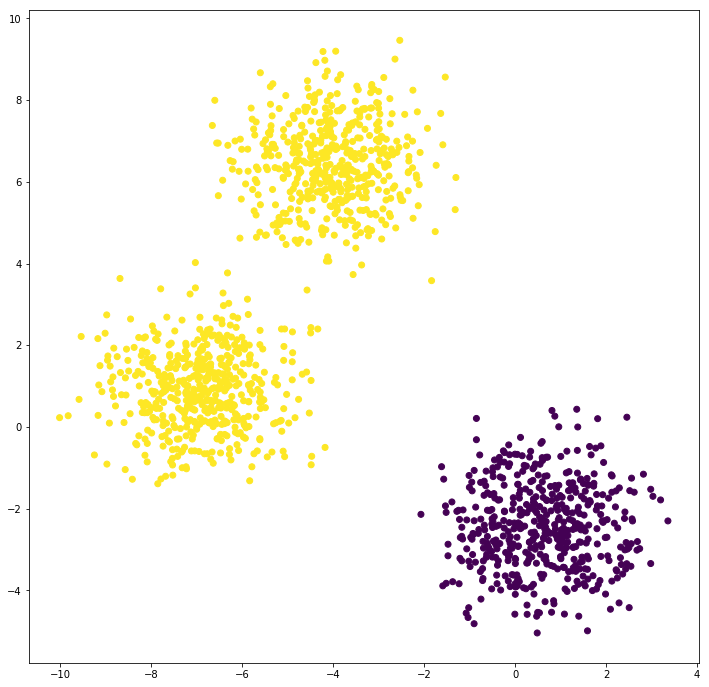

In [64]:
plt.figure(figsize=(12, 12))
kmeans = KMeans(n_clusters=2)
kmeans.fit_predict(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [65]:
kmeans.score(X)

-12838.655661844503

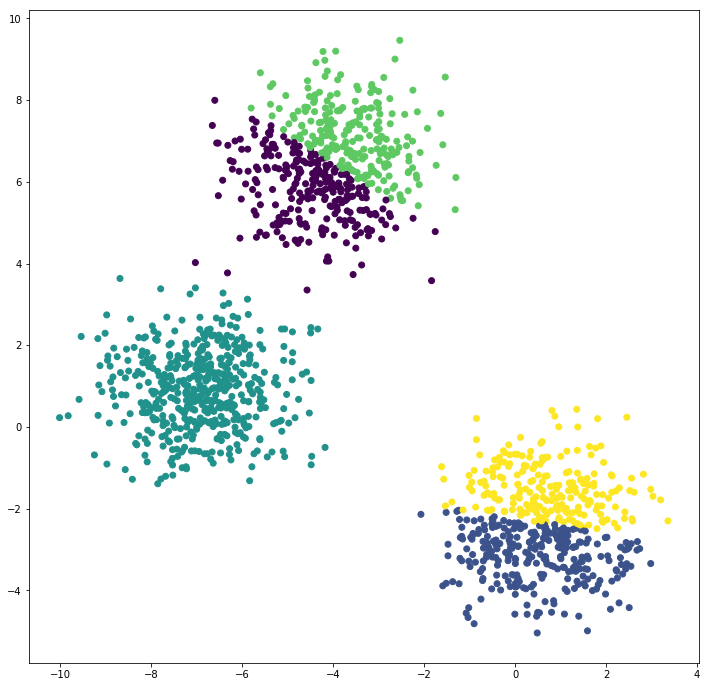

In [66]:
plt.figure(figsize=(12, 12))
kmeans = KMeans(n_clusters=5)
kmeans.fit_predict(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

** There is a problem.**

how to find the best number of cluster ?

# choose number of cluster?

## Elbow method

In [67]:
scores = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(X)
    scores.append([i,kmeans.score(X)])
scores

[[1, -37601.123361442238],
 [2, -12838.655661844503],
 [3, -3117.5261895753729],
 [4, -2757.2398221452713],
 [5, -2406.1311268017935],
 [6, -2076.4998169922192],
 [7, -1826.6696786768371],
 [8, -1582.8296430226019],
 [9, -1393.0509549543185]]

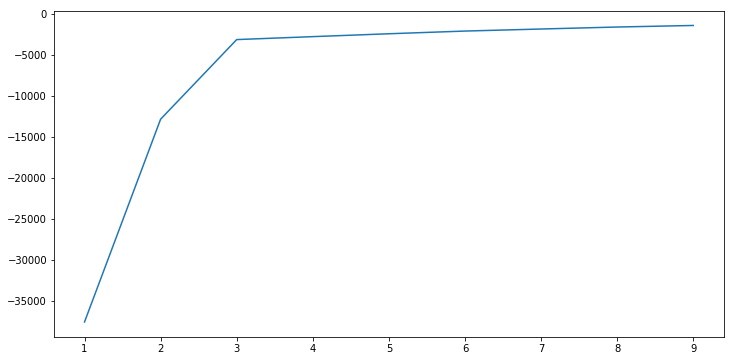

In [72]:
import pandas as pd 
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(np.array(scores))[0],pd.DataFrame(np.array(scores))[1])
plt.show()